In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
events = pd.read_csv("data/events.csv", dtype={'date': 'str', 'event_id': np.int16, 'ref_type': 'category',
                                               'ref_hash': 'int64', 'application_id':np.int16, 'attributed': 'bool',
                                               'device_countrycode': 'int64', 'device_os_version':'float64', 'device_brand': 'float64',
                                               'device_model': 'float64', 'device_city':'float64', 'session_user_agent': 'float64',
                                               'trans_id': 'str', 'user_agent':'float64', 'event_uuid': 'str',
                                               'carrier': 'float64', 'kind':'float64', 'device_os': 'category',
                                               'wifi': np.float16, 'connection_type':'str', 'ip_address': 'int64',
                                               'device_language': 'float64'}, parse_dates = ['date'])
events['day'] = events['date'].dt.date
events['hour'] = events['date'].dt.hour
events.head(5)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,day,hour
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669329342818e+18,255.0,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,0
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669329342818e+18,255.0,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,0
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669329342818e+18,255.0,Cable/DSL,7858558567428669000,4.077062e+17,2019-03-05,0
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669329342818e+18,255.0,Cable/DSL,6324037615828123965,4.077062e+17,2019-03-05,0
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669329342818e+18,255.0,Cable/DSL,2894495631302821483,3.301378e+18,2019-03-09,21


In [3]:
events.dtypes

date                  datetime64[ns]
event_id                       int16
ref_type                    category
ref_hash                       int64
application_id                 int16
attributed                      bool
device_countrycode             int64
device_os_version            float64
device_brand                 float64
device_model                 float64
device_city                  float64
session_user_agent           float64
trans_id                      object
user_agent                   float64
event_uuid                    object
carrier                      float64
kind                         float64
device_os                   category
wifi                         float16
connection_type               object
ip_address                     int64
device_language              float64
day                           object
hour                           int64
dtype: object

In [4]:
events.describe()

,event_id,ref_hash,application_id,device_countrycode,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,wifi,ip_address,device_language,hour
count,2.494423e+06,2.494423e+06,2.494423e+06,2.494423e+06,1.022066e+06,1.164963e+06,2.406456e+06,6.146980e+05,2.482637e+06,1.391527e+06,6.164340e+05,2.489324e+06,2101207.0,2.494423e+06,2.406604e+06,2.494423e+06
mean,9.970445e+01,4.641486e+18,9.910934e+01,6.333597e+18,4.986001e+18,1.633891e+18,4.478847e+18,3.832628e+18,4.719312e+18,4.856492e+18,1.470186e+18,5.364362e+18,NaN,4.620786e+18,5.865447e+18,1.265732e+01
std,1.070903e+02,2.660724e+18,5.780986e+01,1.024000e+03,2.394834e+18,1.626674e+18,2.718014e+18,8.166911e+17,1.769561e+18,2.487552e+18,2.575962e+18,2.242979e+18,0.0,2.672746e+18,2.281192e+18,7.763800e+00
min,0.000000e+00,1.633675e+14,0.000000e+00,6.333597e+18,1.004084e+16,7.949737e+16,9.530216e+14,4.355428e+16,5.527631e+15,5.072532e+15,2.248157e+17,7.758270e+16,0.0,5.287755e+12,2.025809e+16,0.000000e+00
25%,2.200000e+01,2.326142e+18,6.300000e+01,6.333597e+18,4.353750e+18,3.083059e+17,2.331947e+18,3.800080e+18,3.819516e+18,2.723465e+18,2.248157e+17,4.647949e+18,1.0,2.333410e+18,3.301378e+18,4.000000e+00
50%,3.100000e+01,4.688964e+18,6.600000e+01,6.333597e+18,4.353750e+18,5.137992e+17,4.430579e+18,3.800080e+18,3.819516e+18,5.022936e+18,2.248157e+17,5.500848e+18,1.0,4.541498e+18,6.804428e+18,1.500000e+01
75%,1.610000e+02,6.927594e+18,1.450000e+02,6.333597e+18,7.391844e+18,2.987569e+18,6.882415e+18,3.800080e+18,7.164321e+18,6.840860e+18,1.179587e+18,6.169667e+18,255.0,7.044307e+18,6.977049e+18,1.900000e+01
max,7.120000e+02,9.223316e+18,3.220000e+02,6.333597e+18,9.135482e+18,9.178260e+18,9.222450e+18,9.205669e+18,9.220949e+18,9.223277e+18,9.182957e+18,9.215473e+18,255.0,9.223367e+18,9.187882e+18,2.300000e+01


In [5]:
events['ref_hash'].value_counts()

7823950631004872496    2913
7298478026707033340    2822
5034957474698180142    2681
5724169280369284055    2524
1706781657278990931    2300
244029859389272148     2240
7526135353349769077    2079
8876061431560425145    2053
99390558091295167      1966
2514745445577342929    1925
7932055701089699678    1880
959309904051180368     1879
2172957424689981672    1737
8938936221115319274    1712
5517347051664000025    1696
7881865551295335841    1680
2911380620292361100    1615
7984059267284799536    1599
3931396627810108588    1558
5929807100024800254    1460
8291491622395815056    1431
6431911391083614553    1398
6290225060459708362    1384
1392381574052047210    1369
524370095063968889     1355
5639133576747886119    1345
2456256724056711249    1339
8847676025636425100    1336
3436575239155975568    1317
6630253456783010456    1312
                       ... 
157629049434270787        1
2404462553287446258       1
9194020315316075441       1
7813739129937447890       1
7252925027847170864 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


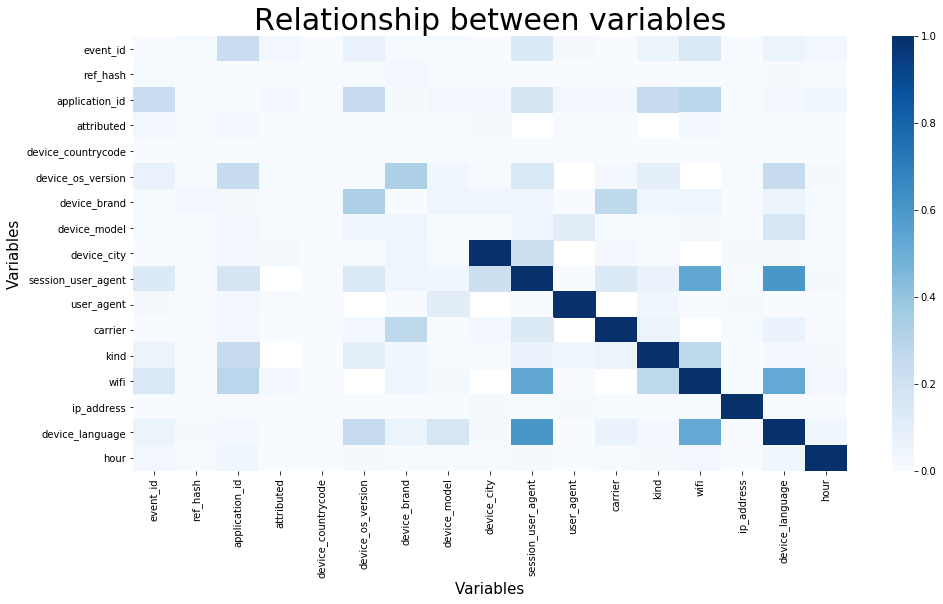

In [6]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
cor = events.corr().abs()
cor.values[[np.arange(8)]*2] = 0
sns.heatmap(cor,cmap='Blues');
ax.axes.set_title("Relationship between variables",fontsize=30)
ax.set_xlabel("Variables",fontsize=15)
ax.set_ylabel("Variables",fontsize=15)
ax.tick_params(labelsize=10)

In [7]:
sns.set(style="ticks", color_codes=True)
#sns.pairplot(events, vars = ['event_id', 'ref_type', 'application_id'])
#sns.pairplot(events, x_vars = ["device_os"], y_vars = ["session_user_agent"]);

In [8]:
events_acotado = events.dropna(subset= ['device_os'])
#events_acotado['device_os'].value_counts()
#sns.barplot(events_acotado['device_os'])

In [9]:
events['ref_hash'].value_counts()

7823950631004872496    2913
7298478026707033340    2822
5034957474698180142    2681
5724169280369284055    2524
1706781657278990931    2300
244029859389272148     2240
7526135353349769077    2079
8876061431560425145    2053
99390558091295167      1966
2514745445577342929    1925
7932055701089699678    1880
959309904051180368     1879
2172957424689981672    1737
8938936221115319274    1712
5517347051664000025    1696
7881865551295335841    1680
2911380620292361100    1615
7984059267284799536    1599
3931396627810108588    1558
5929807100024800254    1460
8291491622395815056    1431
6431911391083614553    1398
6290225060459708362    1384
1392381574052047210    1369
524370095063968889     1355
5639133576747886119    1345
2456256724056711249    1339
8847676025636425100    1336
3436575239155975568    1317
6630253456783010456    1312
                       ... 
157629049434270787        1
2404462553287446258       1
9194020315316075441       1
7813739129937447890       1
7252925027847170864 

In [10]:
events['total'] = 1
events['prom'] = 1
repeticiones_por_ip = events.groupby(['application_id', 'ip_address']).agg({'total':'sum', 'prom':'sum'}).reset_index()
repeticiones_por_ip = repeticiones_por_ip[['application_id', 'total', 'prom']].copy()
repeticiones_por_ip = repeticiones_por_ip.groupby('application_id').agg({'total':'sum', 'prom':'mean'}).reset_index()
repeticiones_por_ip['trafico'] = repeticiones_por_ip['total']/repeticiones_por_ip['prom']
repeticiones_por_ip.head(5)

,application_id,total,prom,trafico
0,0,56,1.191489,47.0
1,2,5931,24.012146,247.0
2,5,22,1.833333,12.0
3,6,27,1.038462,26.0
4,7,48005,6.088914,7884.0


In [11]:
repeticiones_por_ip.sort_values(by=['prom'], ascending= False).head(10)

,application_id,total,prom,trafico
43,57,134498,156.757576,858.0
55,70,355,88.750000,4.0
251,292,2276,55.512195,41.0
229,265,8393,43.262887,194.0
190,215,7676,42.644444,180.0
27,39,76448,33.796640,2262.0
15,23,100,33.333333,3.0
117,136,15362,32.685106,470.0
40,54,29284,30.922914,947.0
106,125,23018,30.010430,767.0


In [12]:
repeticiones_por_ip.sort_values(by=['total'], ascending= False).head(10)

,application_id,total,prom,trafico
52,66,325696,4.074409,79937.0
50,64,259084,7.465322,34705.0
125,145,252431,3.620380,69725.0
49,63,181555,4.879461,37208.0
86,103,137513,4.078326,33718.0
43,57,134498,156.757576,858.0
102,121,123711,20.280492,6100.0
187,212,108489,4.134017,26243.0
95,113,82962,17.414358,4764.0
27,39,76448,33.796640,2262.0


In [13]:
repeticiones_por_ip.sort_values(by=['trafico'], ascending= False).head(10)

,application_id,total,prom,trafico
52,66,325696,4.074409,79937.0
125,145,252431,3.620380,69725.0
49,63,181555,4.879461,37208.0
50,64,259084,7.465322,34705.0
86,103,137513,4.078326,33718.0
187,212,108489,4.134017,26243.0
148,170,55820,4.220156,13227.0
4,7,48005,6.088914,7884.0
102,121,123711,20.280492,6100.0
159,182,6085,1.150936,5287.0


In [14]:
for i in events.columns: 
    print('Columna: ' + str(i))
    print(events[str(i)].value_counts())
    print('\n')

Columna: date
2019-03-12 14:36:58.017    3
2019-03-08 00:55:23.364    3
2019-03-09 00:12:42.354    3
2019-03-12 22:03:19.213    3
2019-03-12 23:00:08.146    3
2019-03-08 02:31:09.128    3
2019-03-07 01:57:38.934    3
2019-03-10 02:30:07.786    3
2019-03-12 13:59:31.416    3
2019-03-09 21:58:48.782    3
2019-03-11 23:22:55.179    3
2019-03-11 15:35:04.327    2
2019-03-08 23:56:12.056    2
2019-03-05 14:13:52.465    2
2019-03-09 00:00:33.377    2
2019-03-07 23:18:39.146    2
2019-03-09 16:45:57.573    2
2019-03-07 18:20:27.665    2
2019-03-09 04:38:45.865    2
2019-03-11 15:41:40.209    2
2019-03-07 00:11:55.681    2
2019-03-08 23:13:31.170    2
2019-03-11 00:40:46.506    2
2019-03-11 04:09:22.967    2
2019-03-07 16:50:59.211    2
2019-03-07 02:17:01.335    2
2019-03-05 11:29:41.587    2
2019-03-09 20:45:28.875    2
2019-03-08 18:55:40.165    2
2019-03-06 23:55:11.009    2
                          ..
2019-03-12 02:39:01.880    1
2019-03-06 02:10:38.682    1
2019-03-08 19:59:36.611    1


In [15]:
grupos = ['event_id', 'ref_type','application_id', 'device_os', 'wifi', 'connection_type', 'hour', 'day']
top5 = {}
for i in grupos: 
    top5[i]= events[i].value_counts().head(5).index.tolist()
top5

{'application_id': [66, 64, 145, 63, 103],
 'connection_type': ['Cable/DSL', 'Cellular', 'Corporate'],
 'day': [datetime.date(2019, 3, 13),
  datetime.date(2019, 3, 12),
  datetime.date(2019, 3, 10),
  datetime.date(2019, 3, 9),
  datetime.date(2019, 3, 8)],
 'device_os': ['7.531669329342818e+18',
  '6.941824626260379e+18',
  '2.7488313570525307e+18',
  '5.916186881232351e+18'],
 'event_id': [22, 31, 161, 1, 138],
 'hour': [0, 23, 1, 22, 21],
 'ref_type': ['1891515180541284343', '1494519392962156891'],
 'wifi': [1.0, 255.0, 0.0]}

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


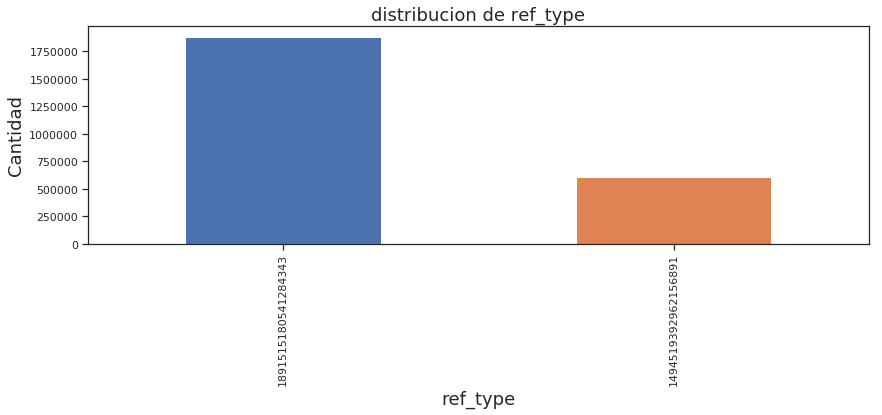

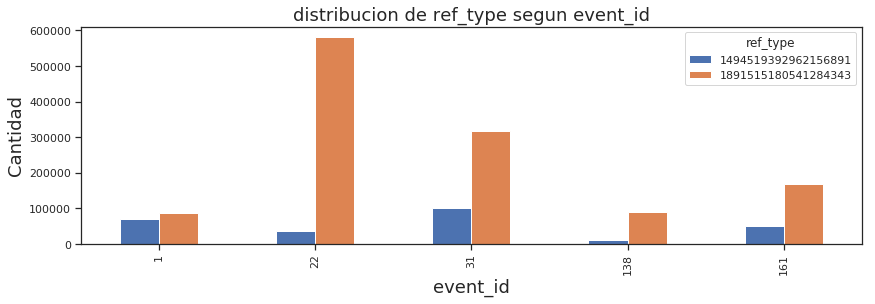

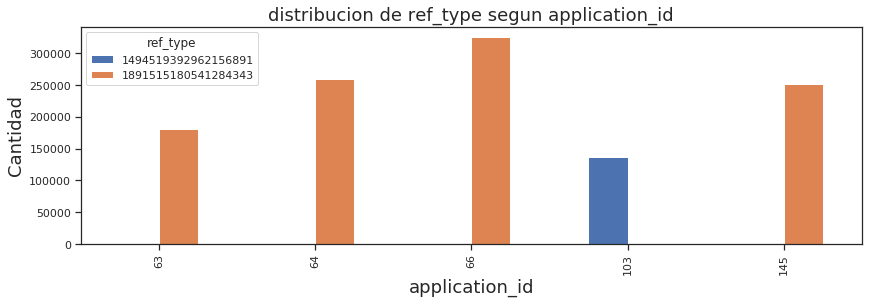

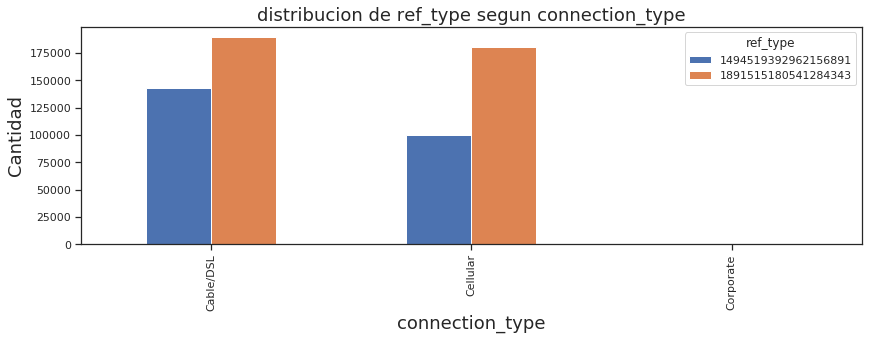

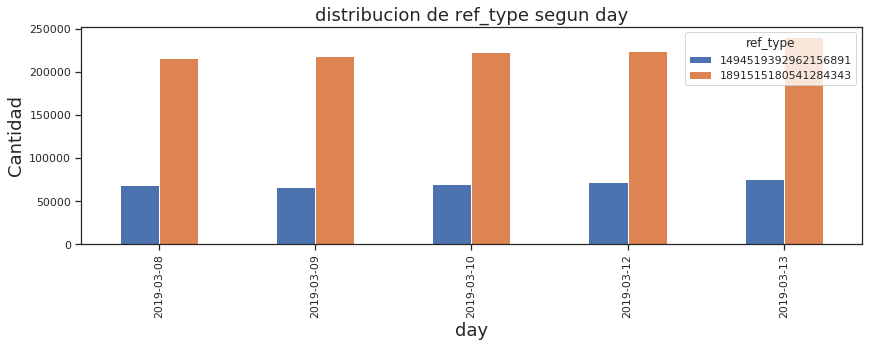

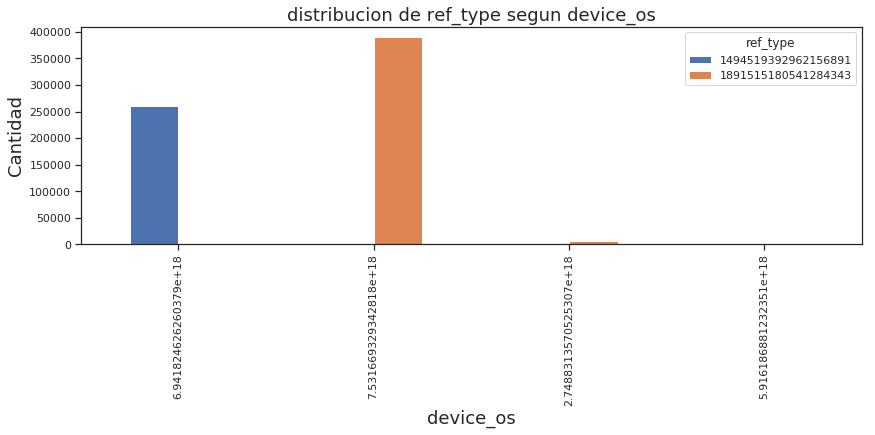

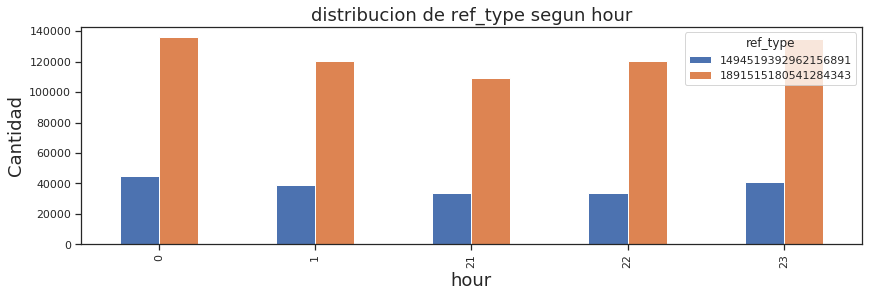

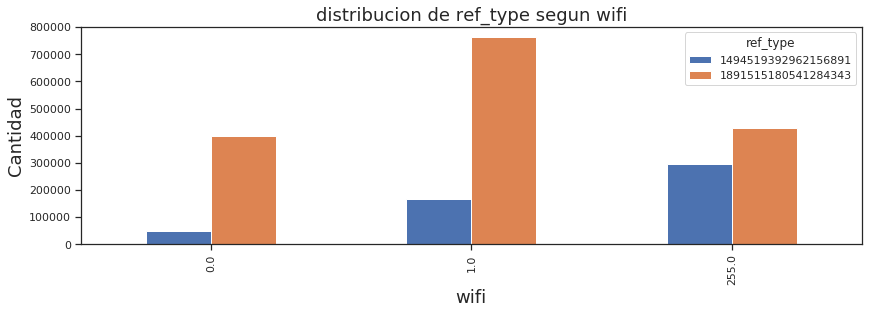

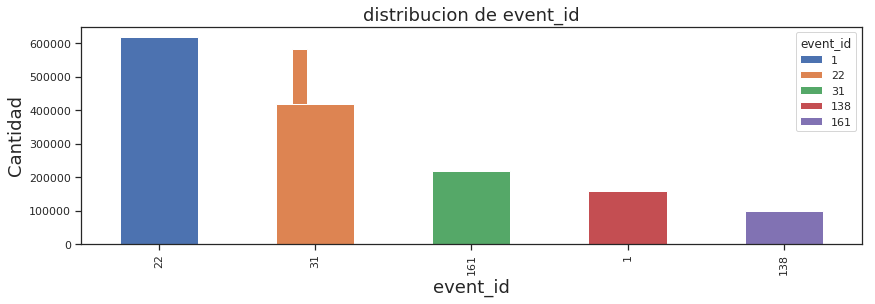

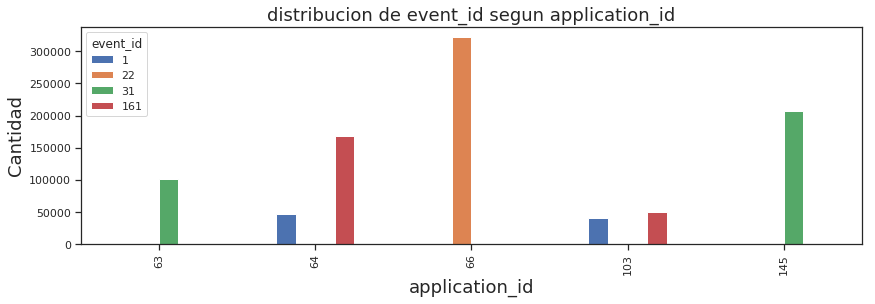

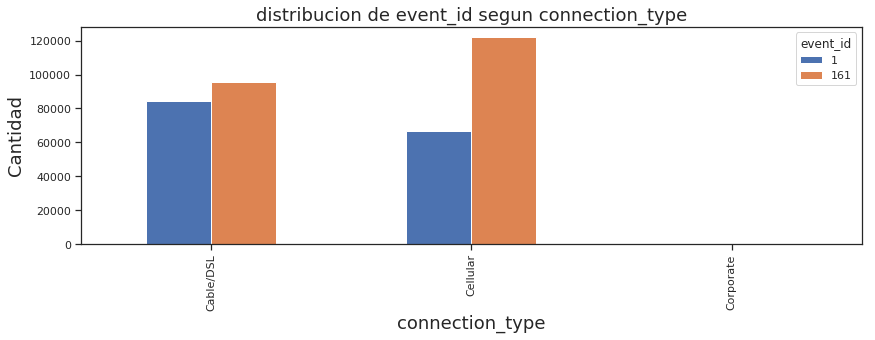

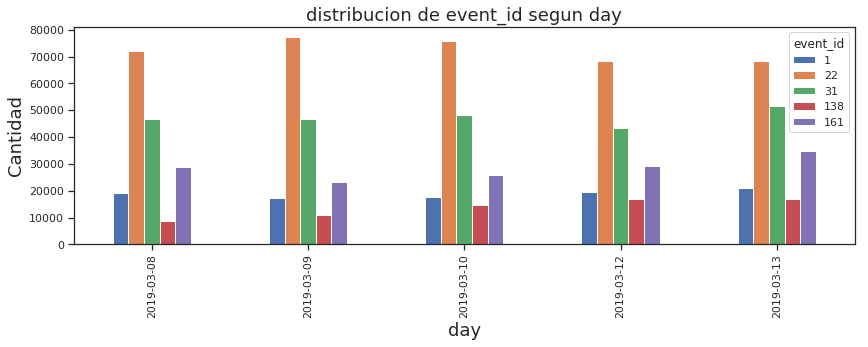

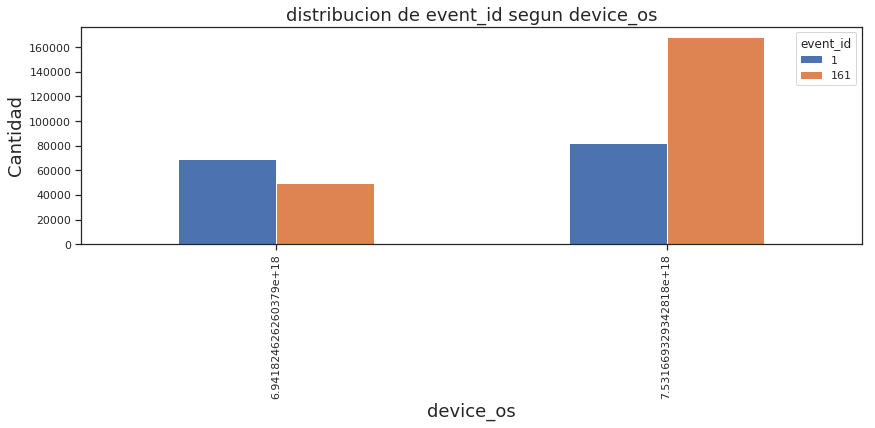

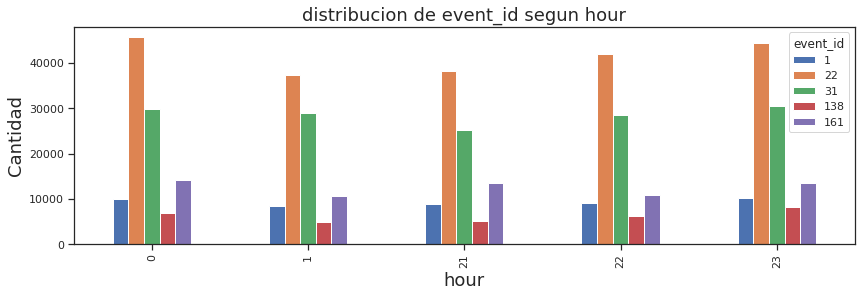

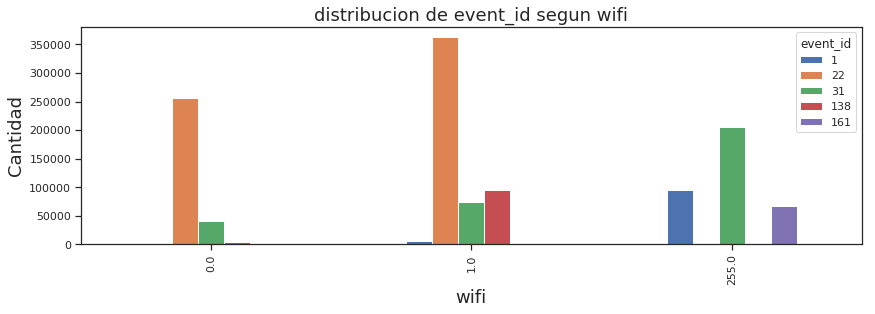

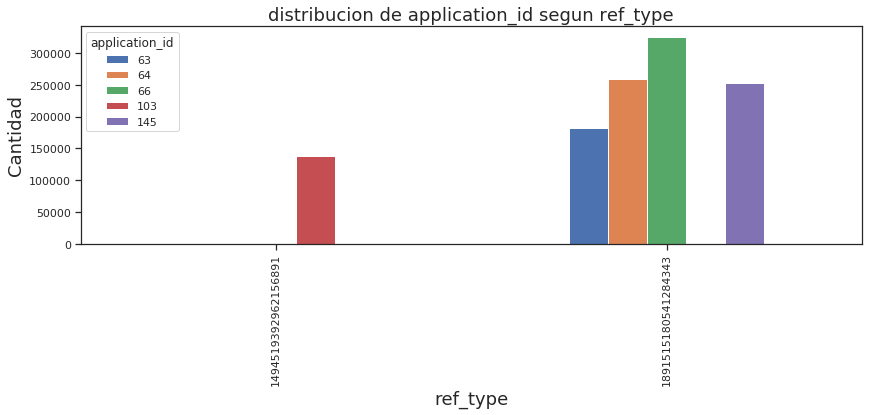

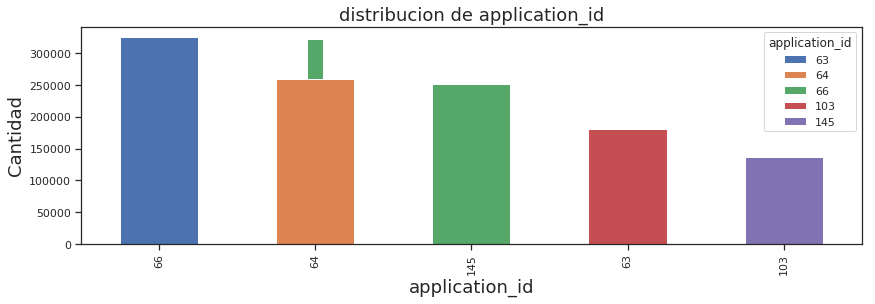

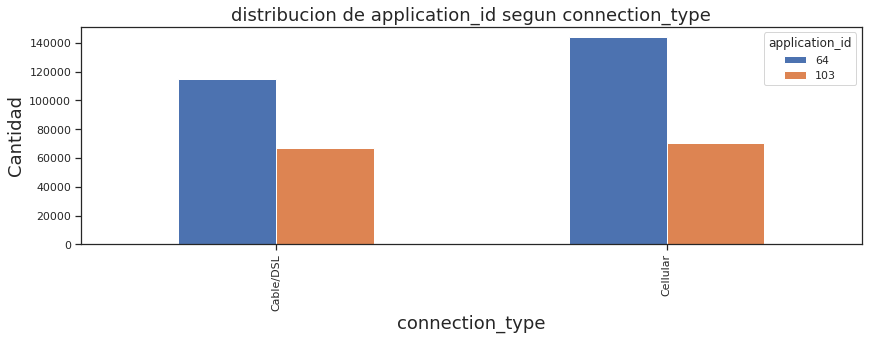

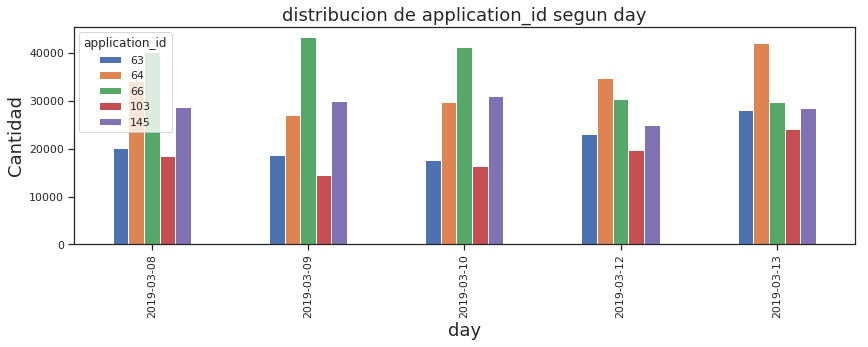

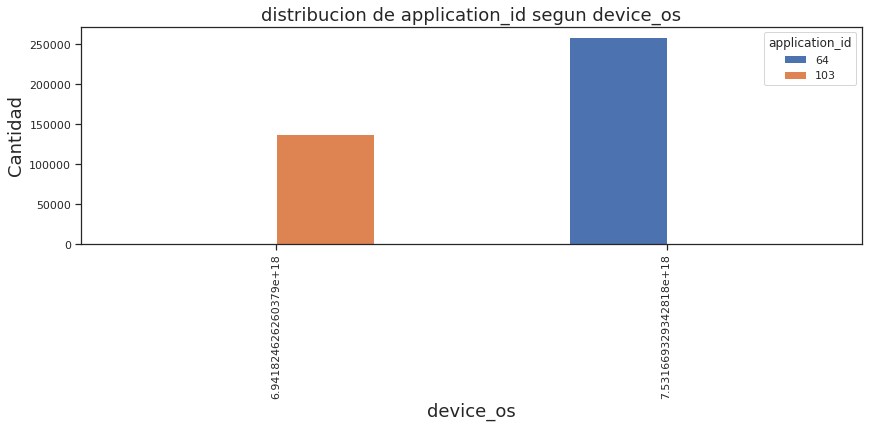

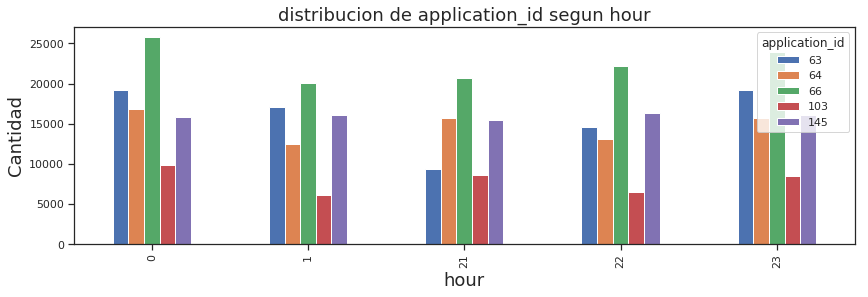

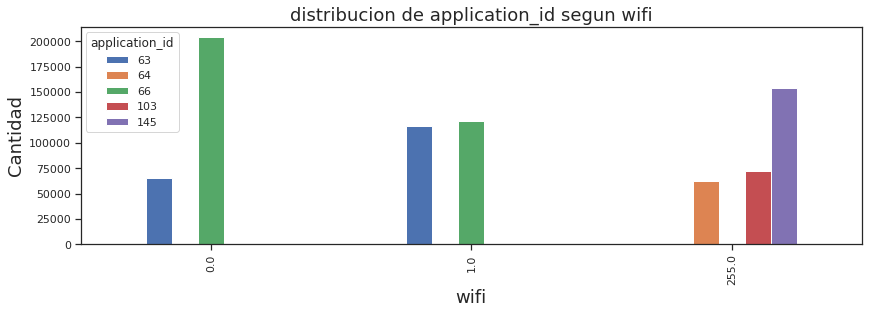

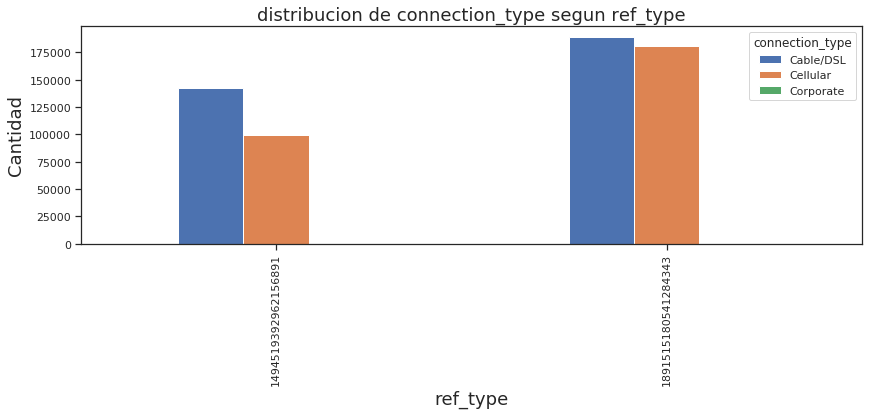

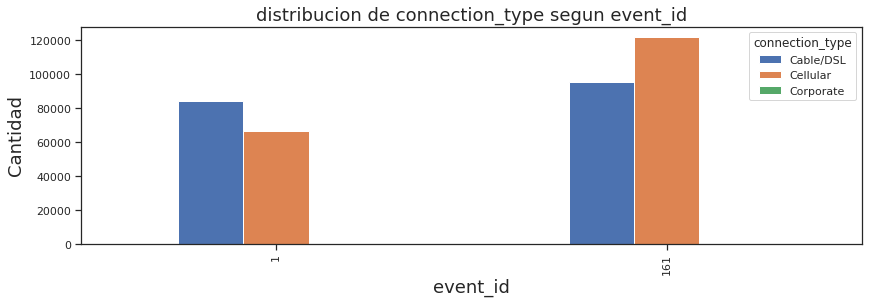

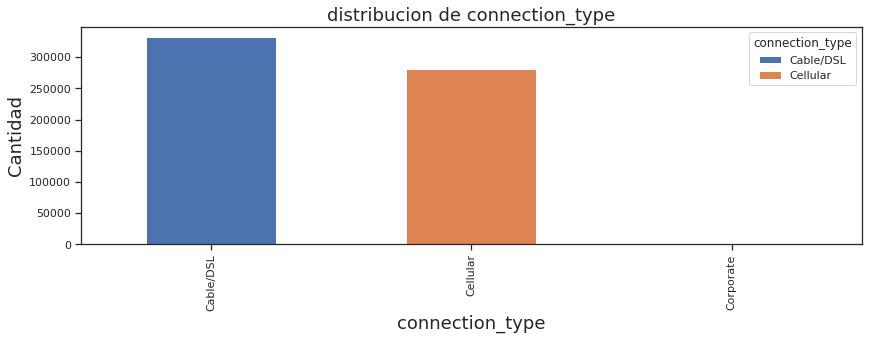

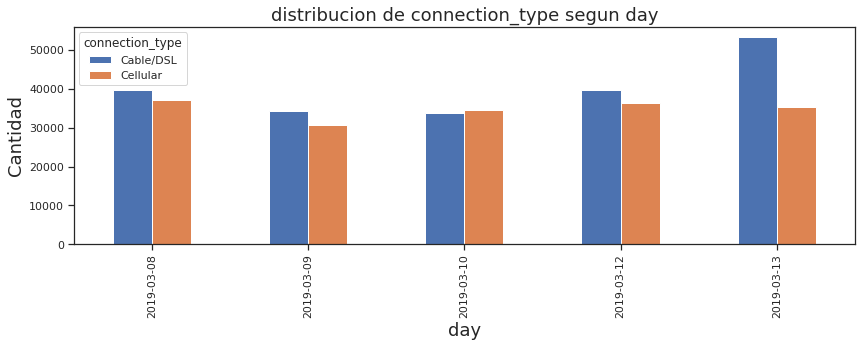

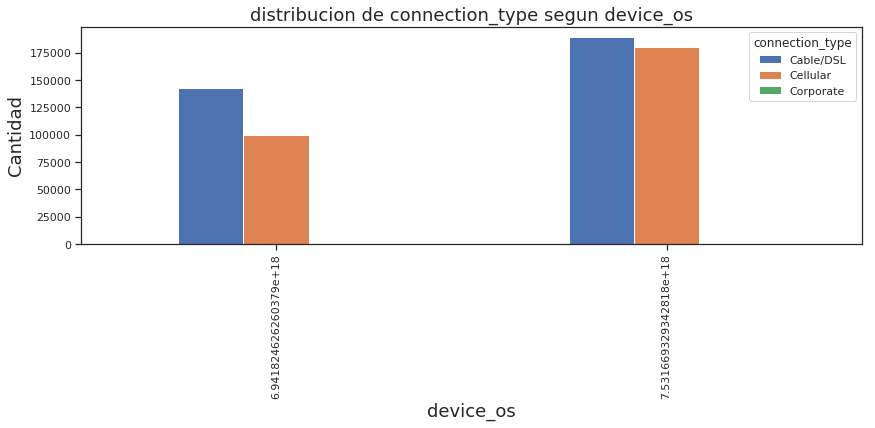

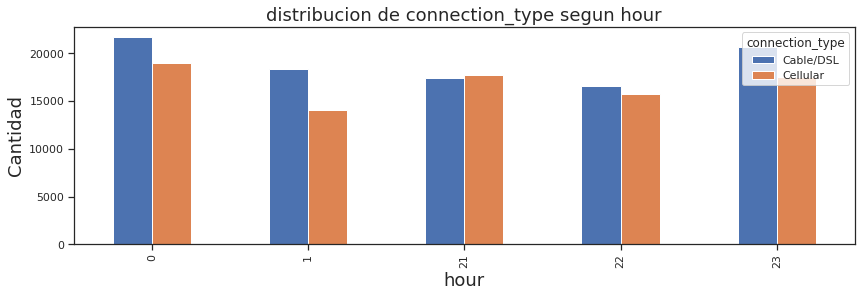

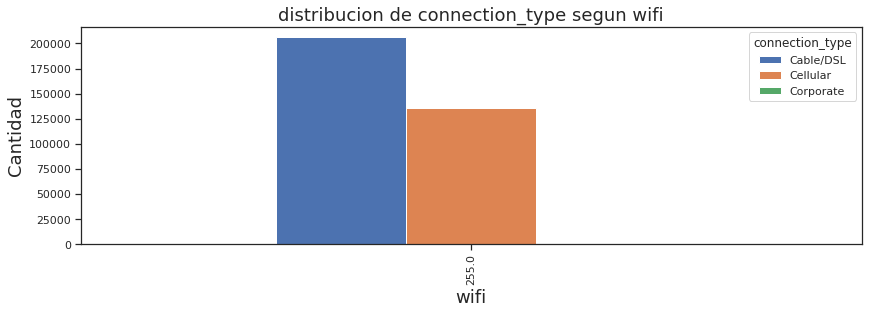

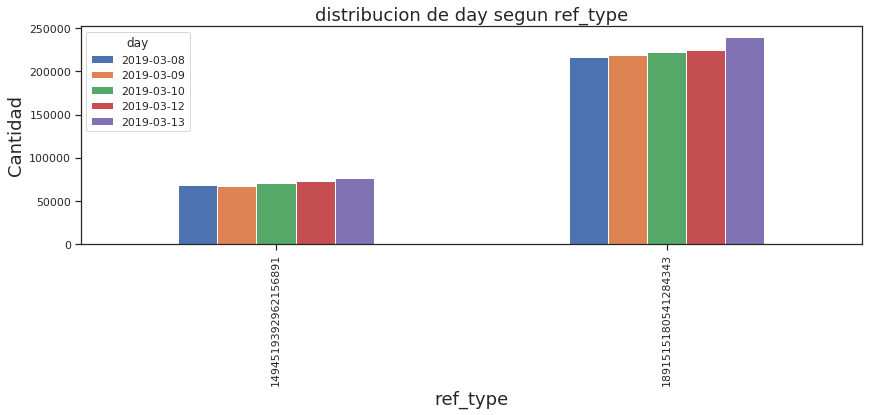

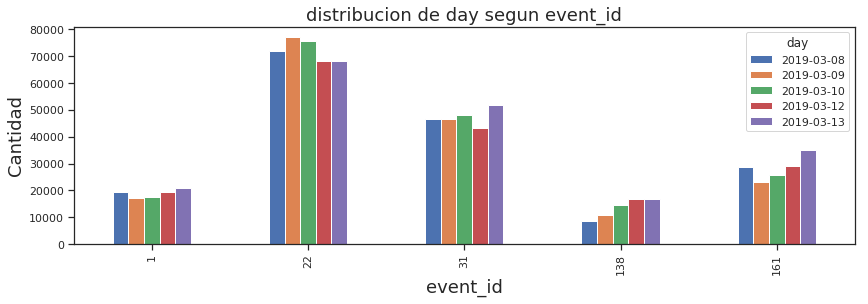

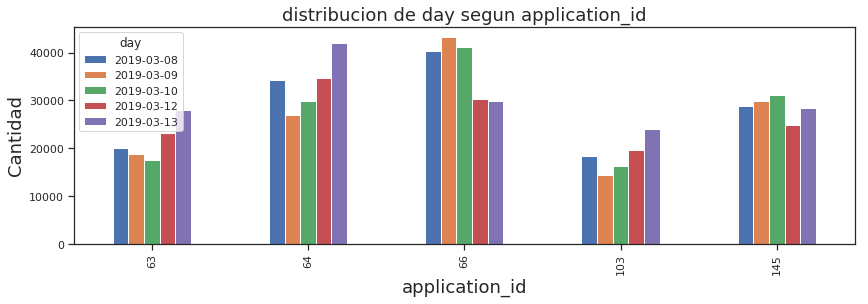

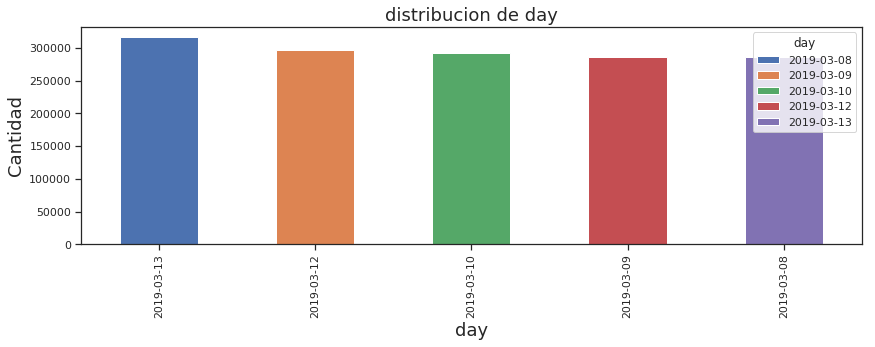

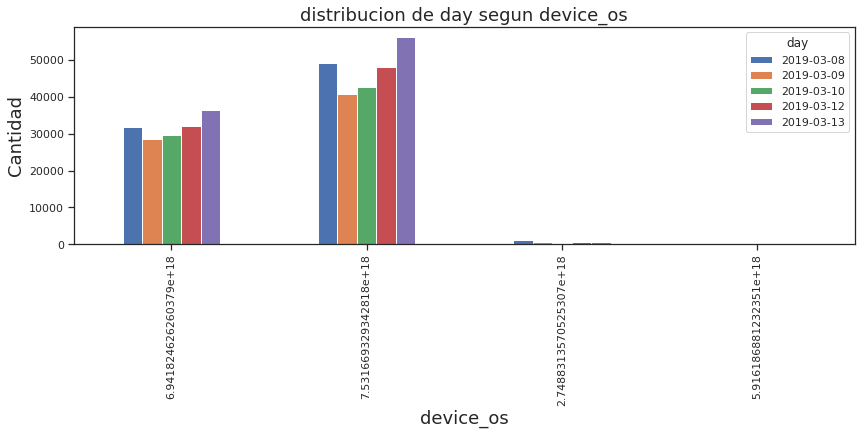

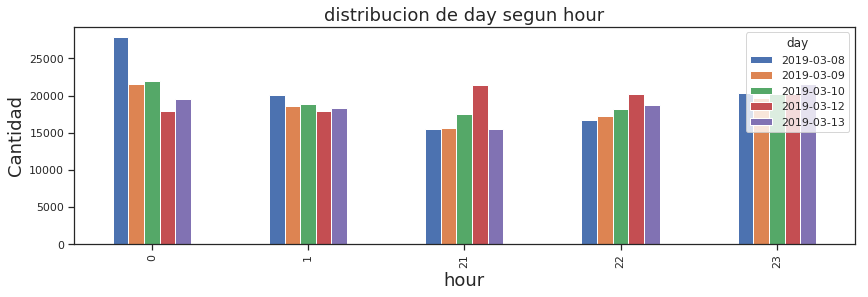

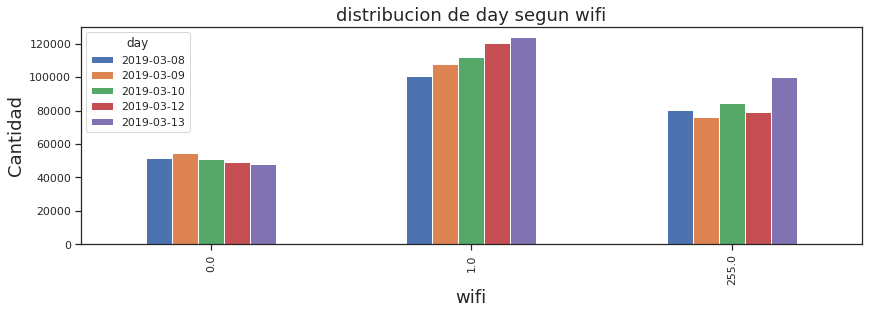

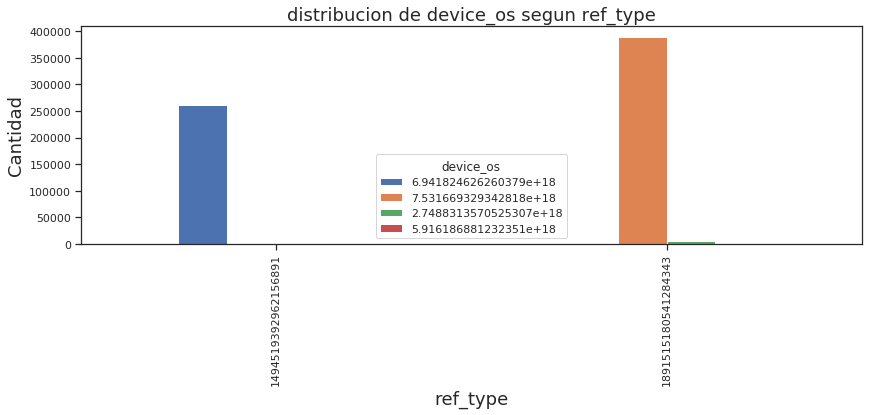

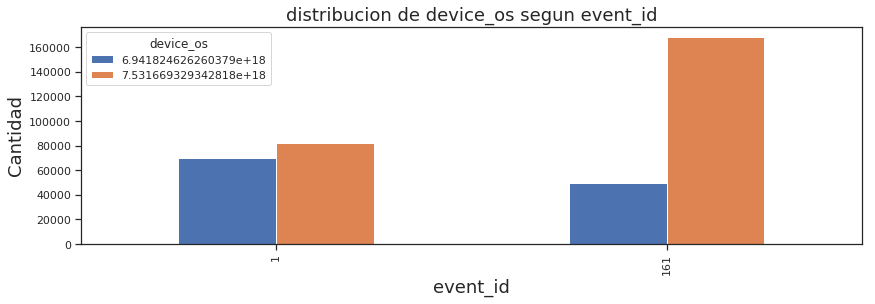

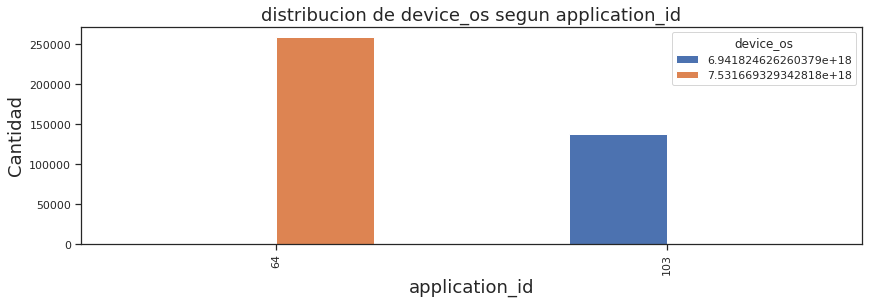

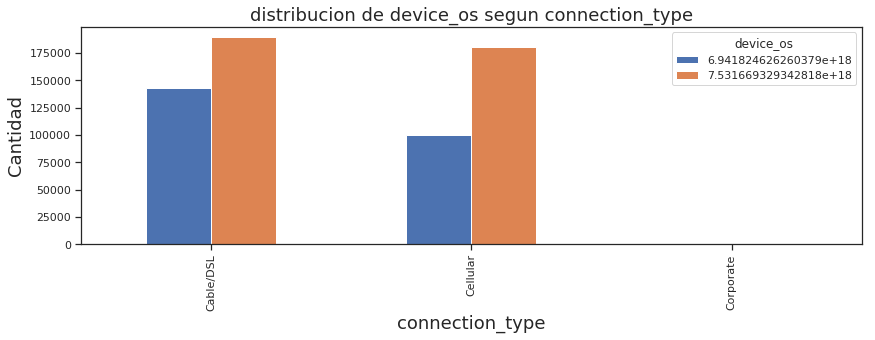

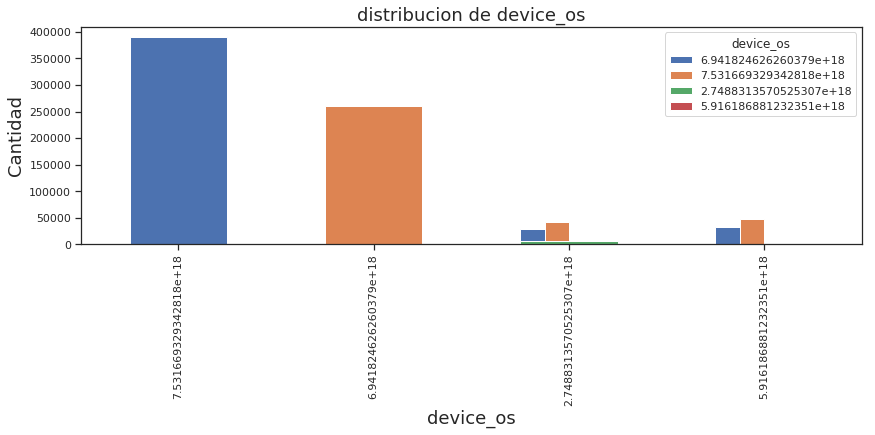

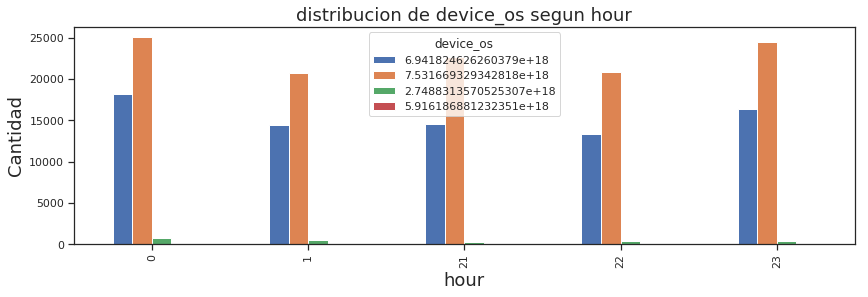

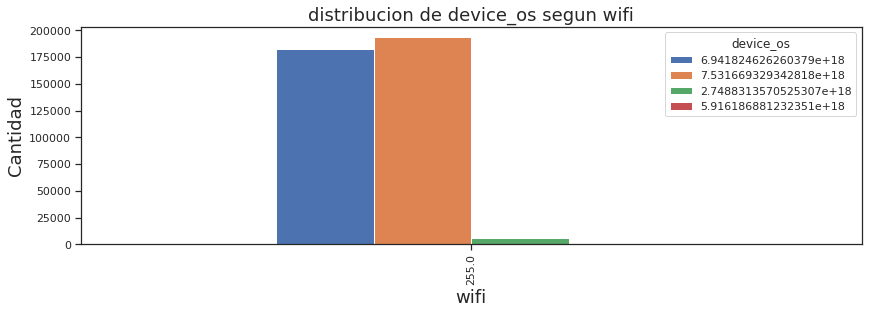

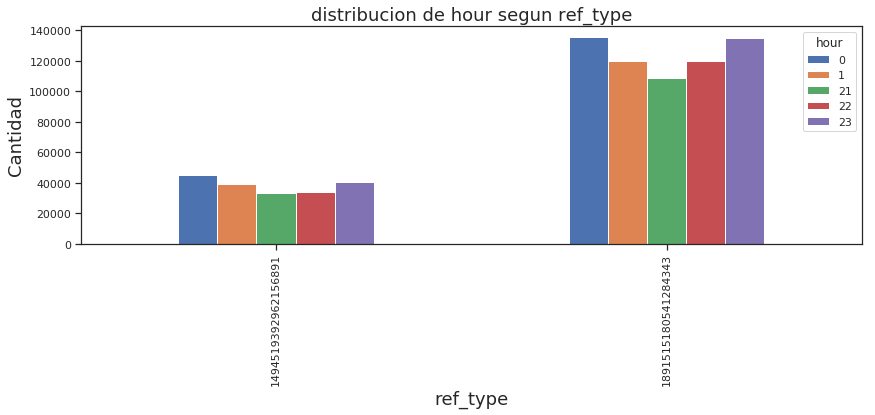

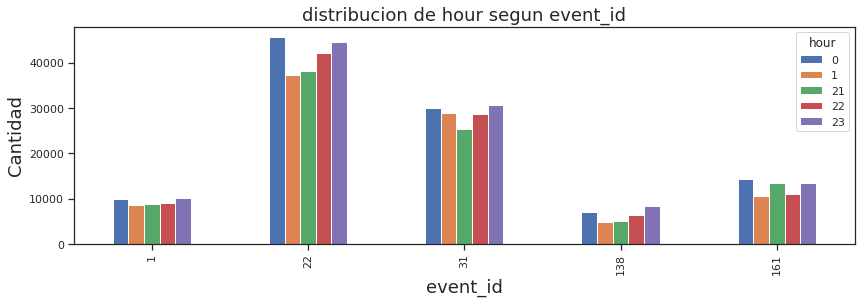

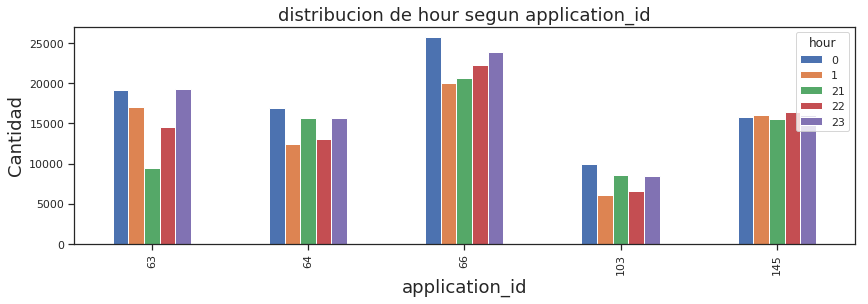

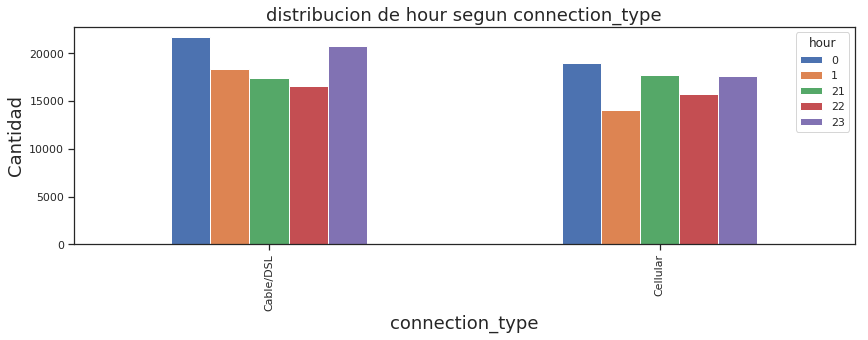

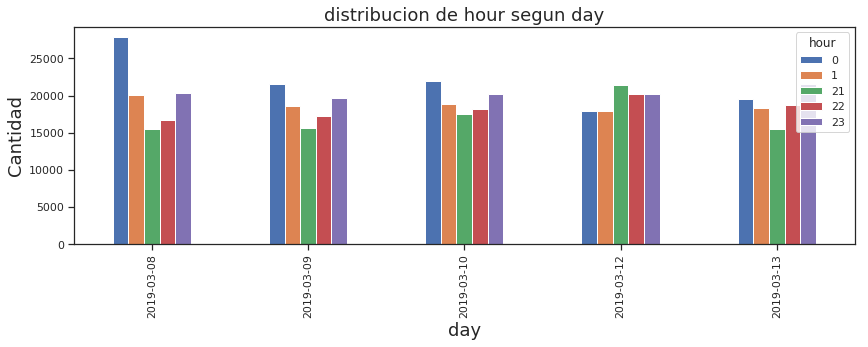

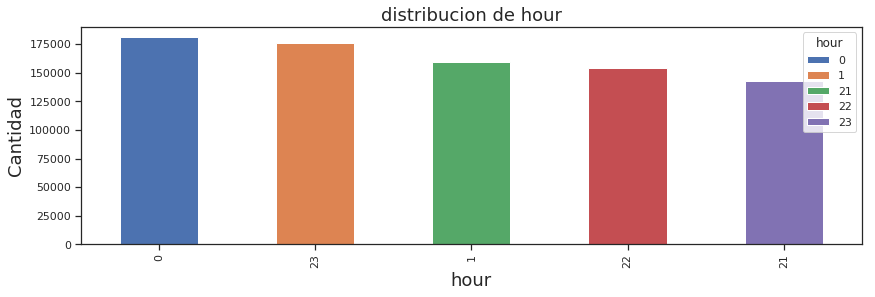

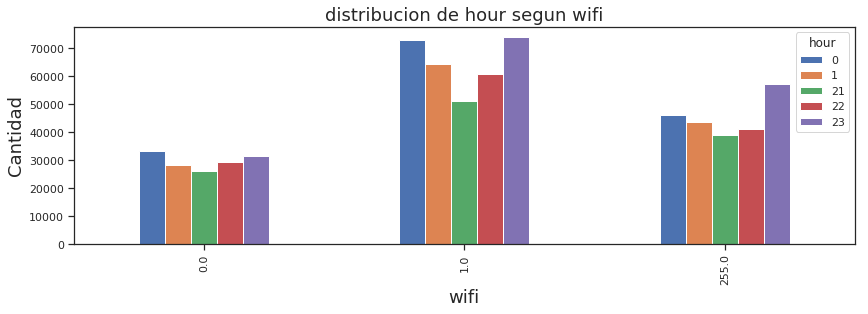

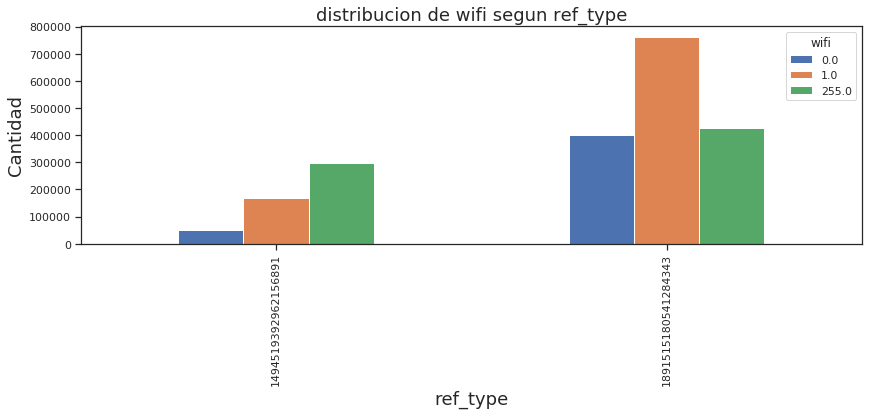

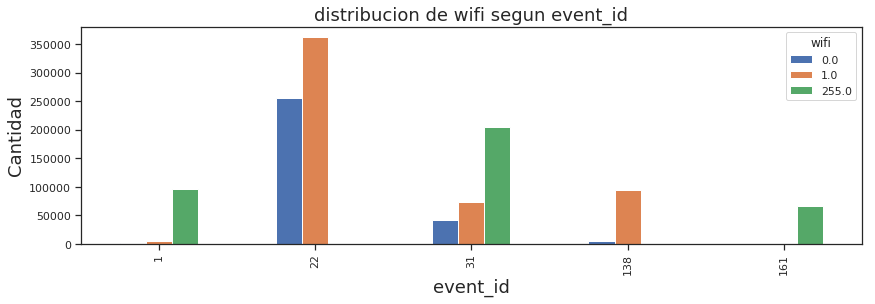

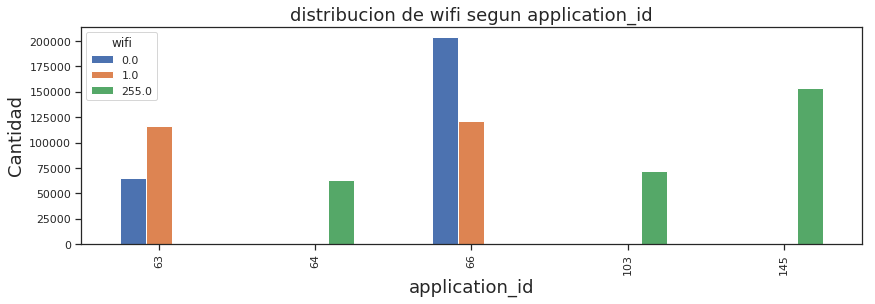

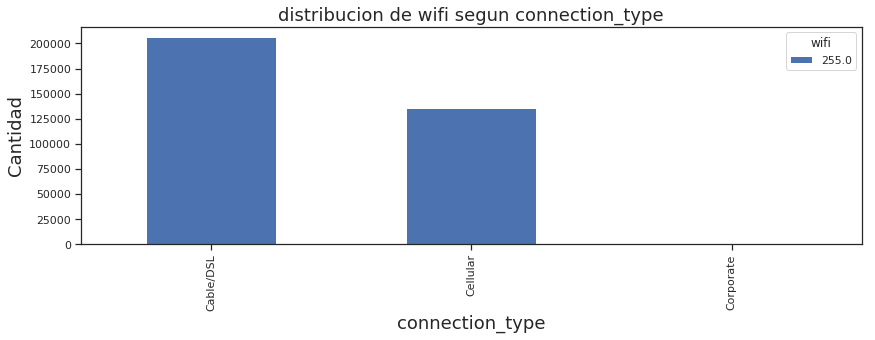

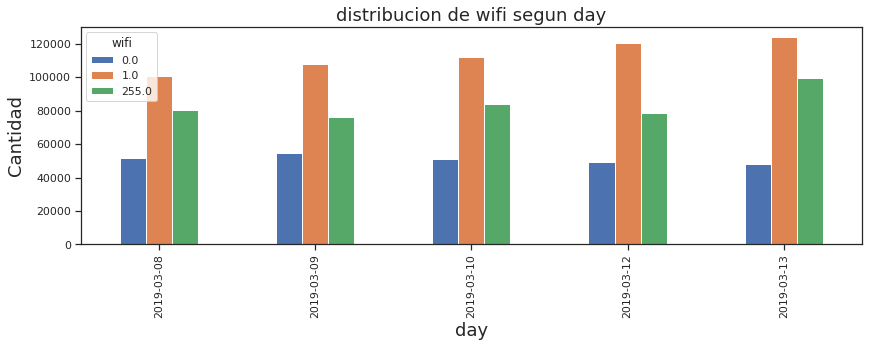

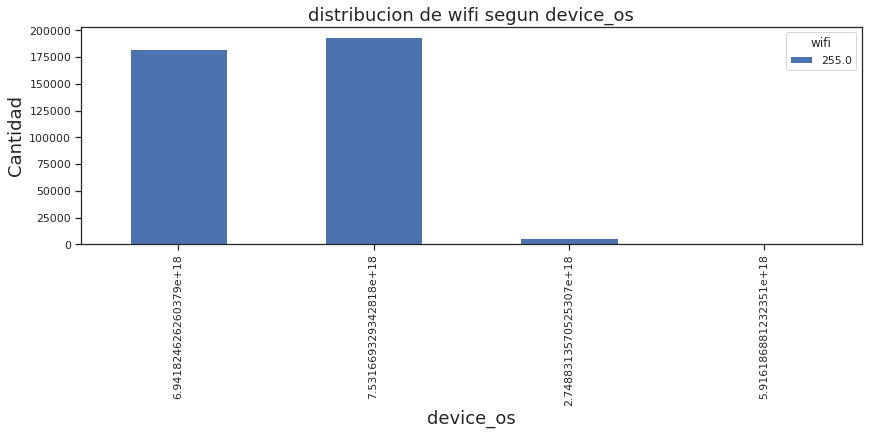

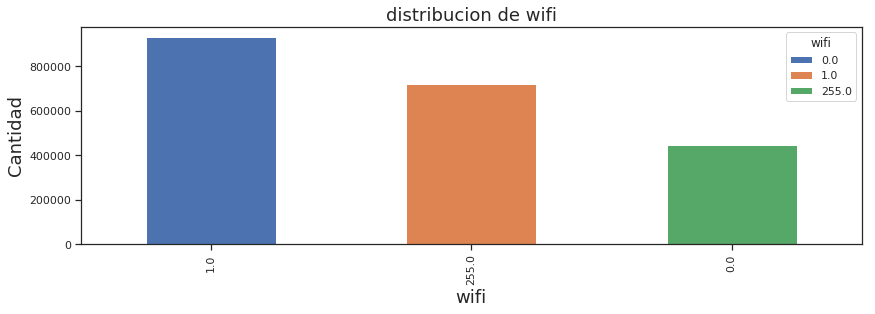

In [16]:
def barplot_simple(i):
    events_filtrado = events.loc[events[i].isin(top5[i])][i]
    if events_filtrado.empty:
        print('no pude hacer barplot de' + i)
        return
    plot = events_filtrado.value_counts().plot(kind='bar',figsize=(14,4));
    plot.set_title('distribucion de ' + i, fontsize=18)
    plot.set_xlabel(i,fontsize=18)
    plot.set_ylabel('Cantidad', fontsize=18)
    plt.savefig('events/top5'+str(i)+'.png', bbox_inches = 'tight')

def barplot_doble(i, j):
    events_filtrado = events.loc[events[i].isin(top5[i])].loc[events[j].isin(top5[j])]
    if events_filtrado.empty:
        print('no pude hacer barplot de ' + j + ' segun ' + i)
        return
    plot = pd.crosstab(events_filtrado[j], events_filtrado[i]).plot(kind='bar',figsize=(14,4));
    plot.set_title('distribucion de ' + i + ' segun ' + j, fontsize=18)
    plot.set_xlabel(j,fontsize=18)
    plot.set_ylabel('Cantidad', fontsize=18)
    plt.savefig('events/top5'+str(j)+'_segun_top5'+str(i)+'.png', bbox_inches = 'tight')
    
for i in top5.keys():
    for j in top5.keys():
        if i == j:
            barplot_simple(i)
        else:
            barplot_doble(i, j)

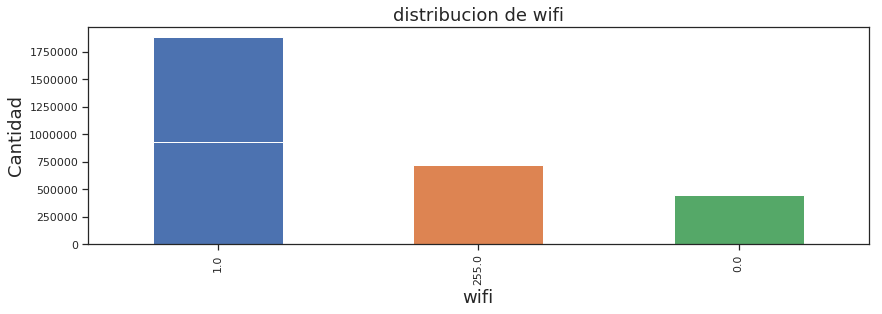

In [17]:
for i in top5.keys():
    barplot_simple(i)

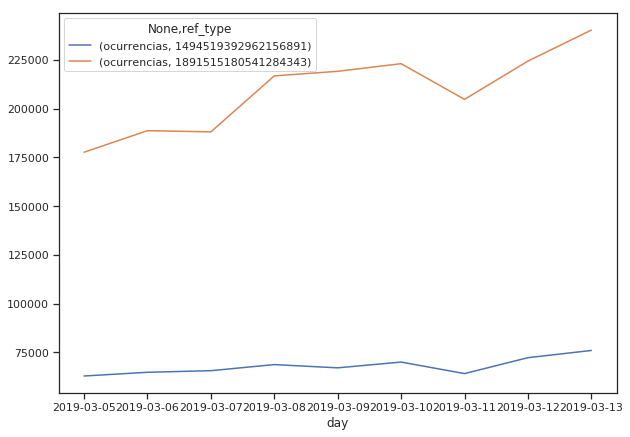

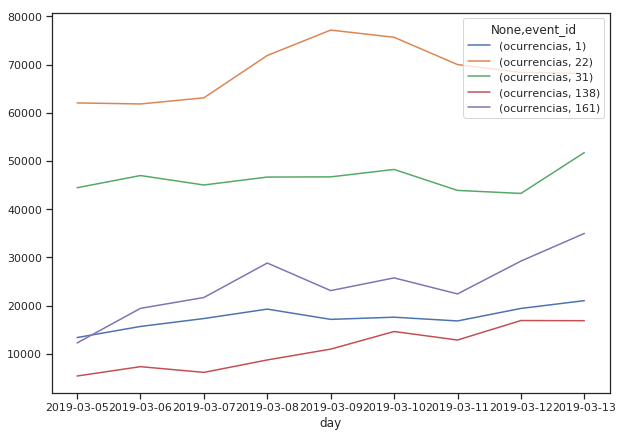

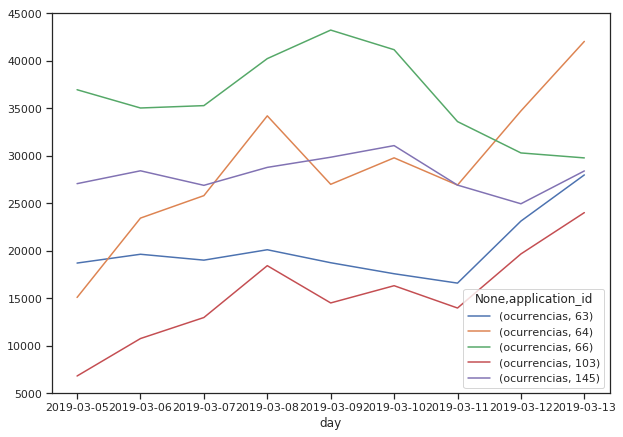

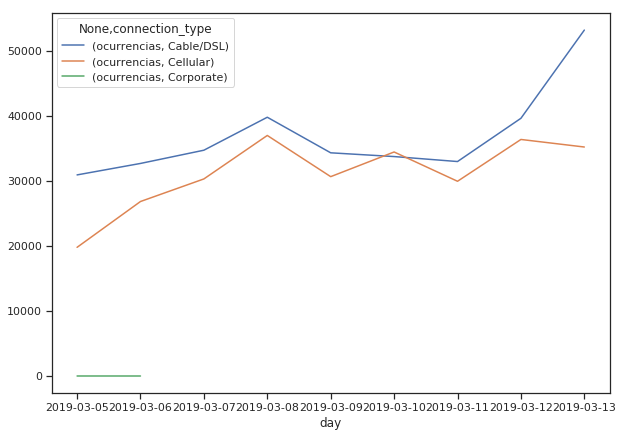

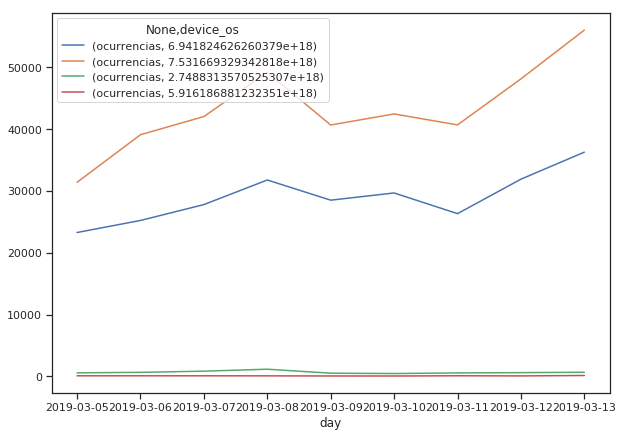

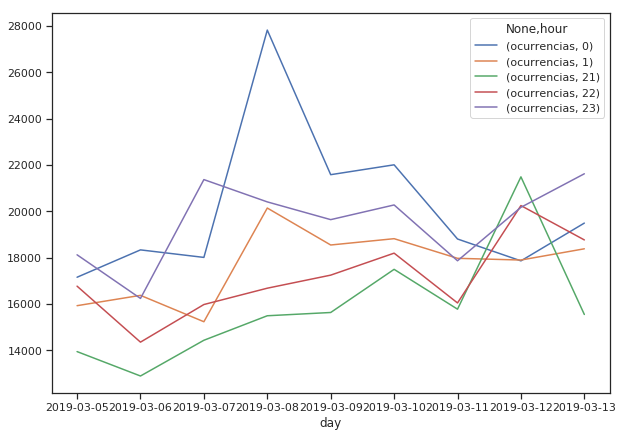

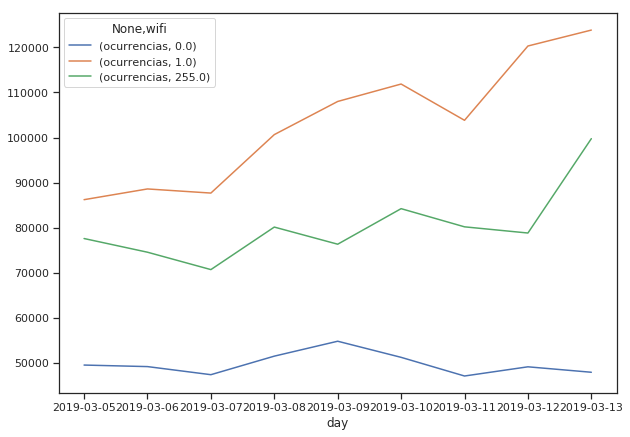

In [18]:
events['ocurrencias'] = 1

for i in top5.keys():
    if i != 'day':
        events.loc[events[i].isin(top5[i])][['day',i, 'ocurrencias']].groupby(['day',i]).count().unstack().plot(figsize = (10,7))

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


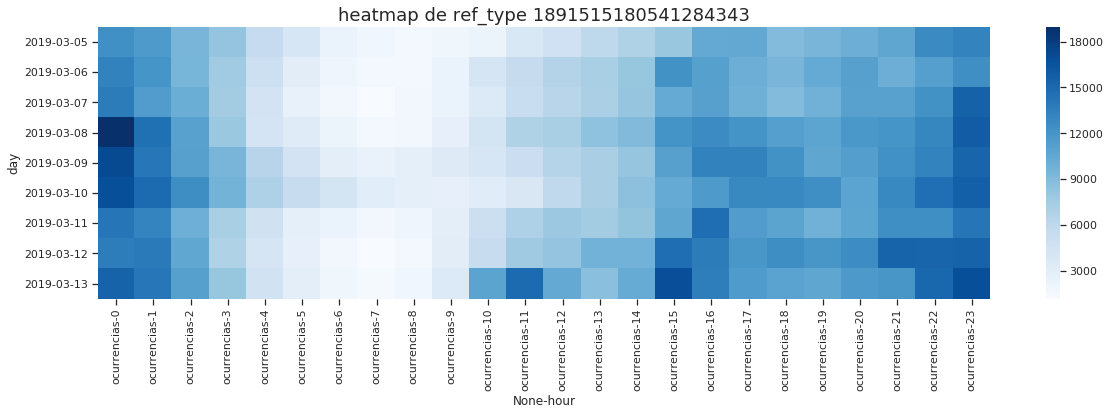

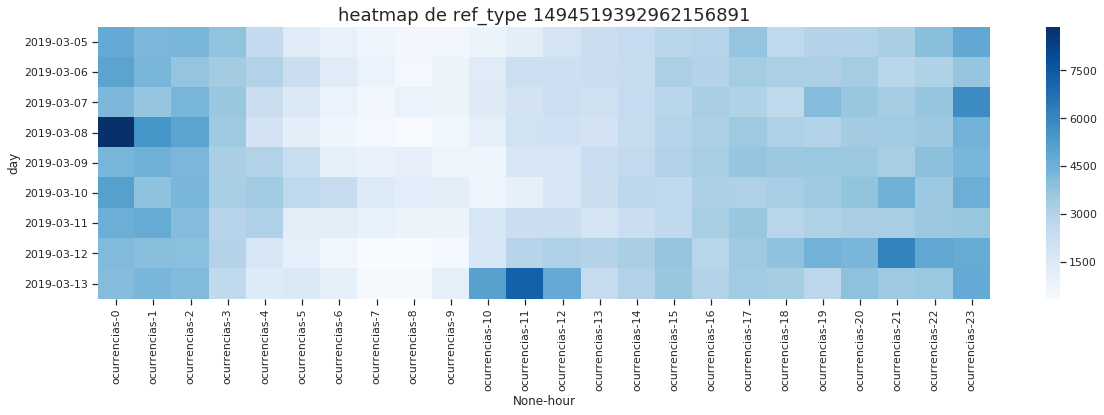

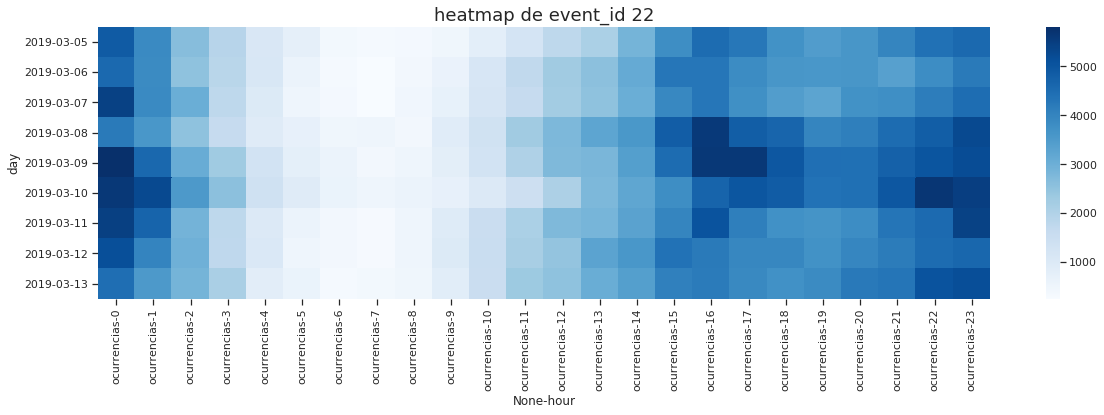

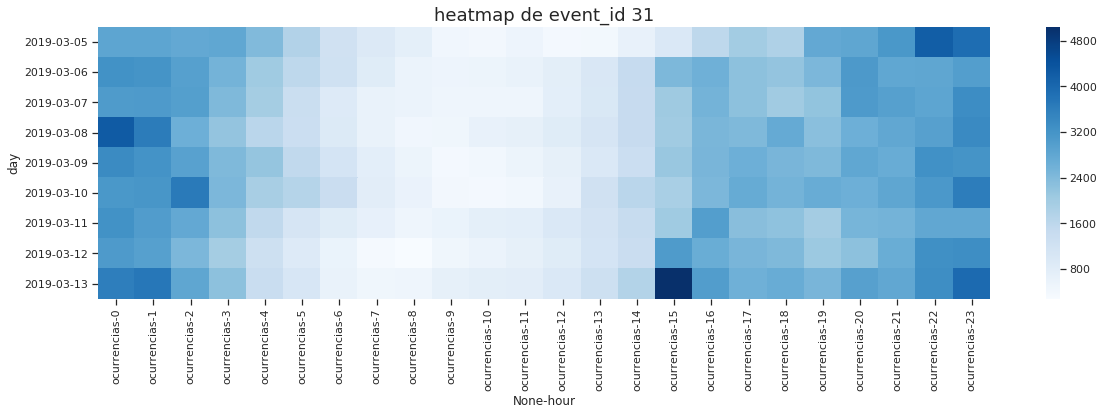

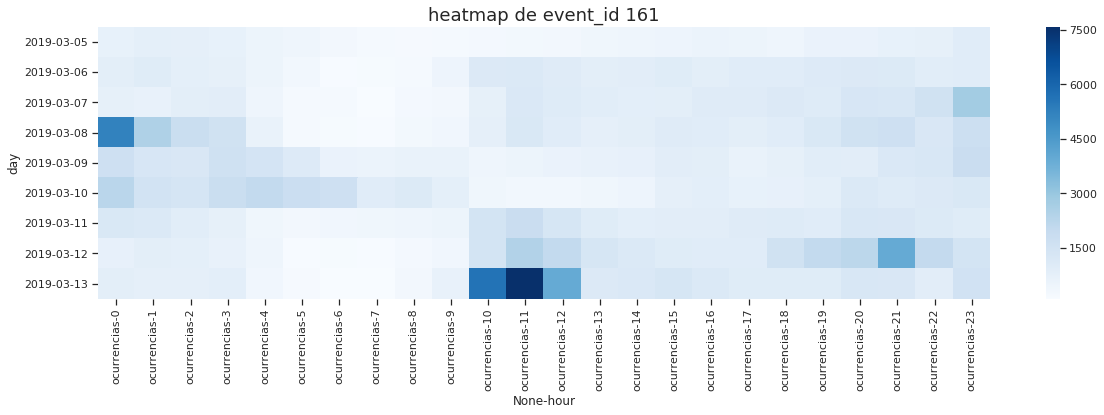

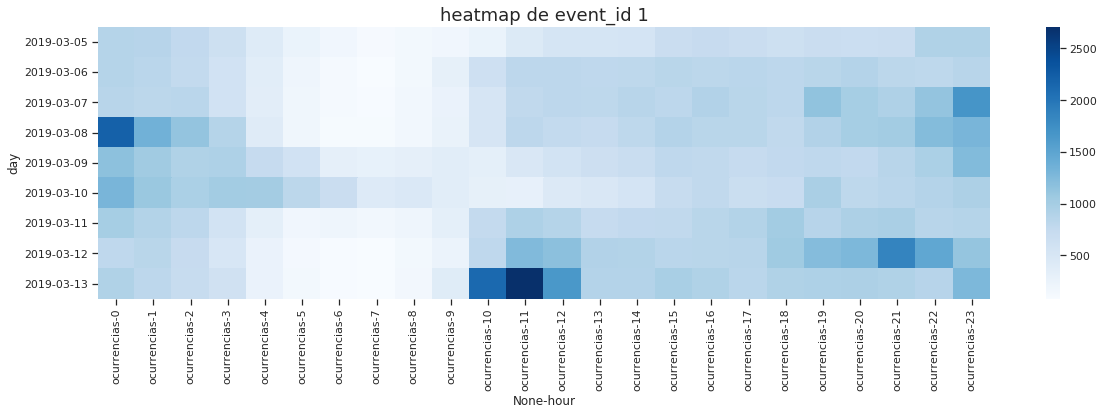

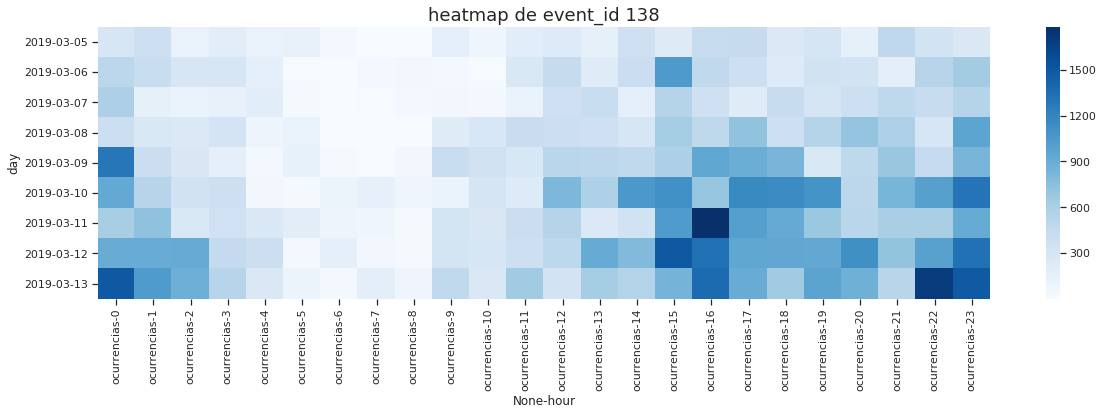

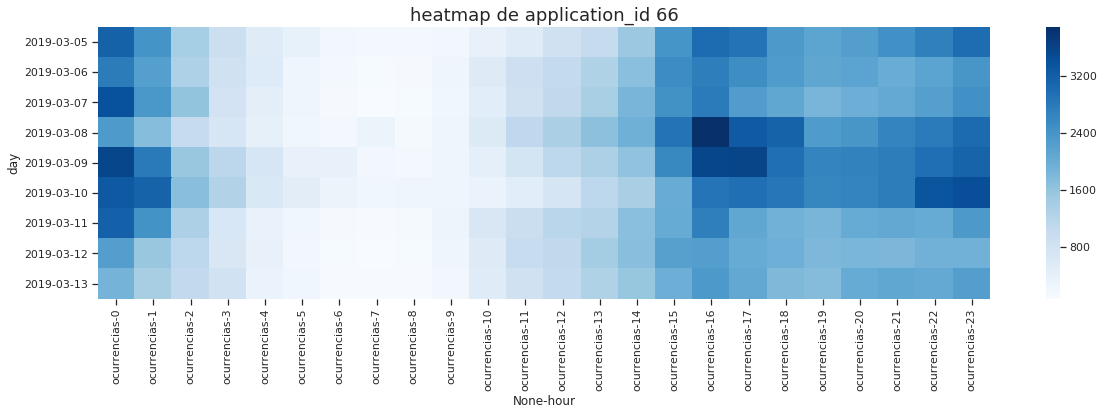

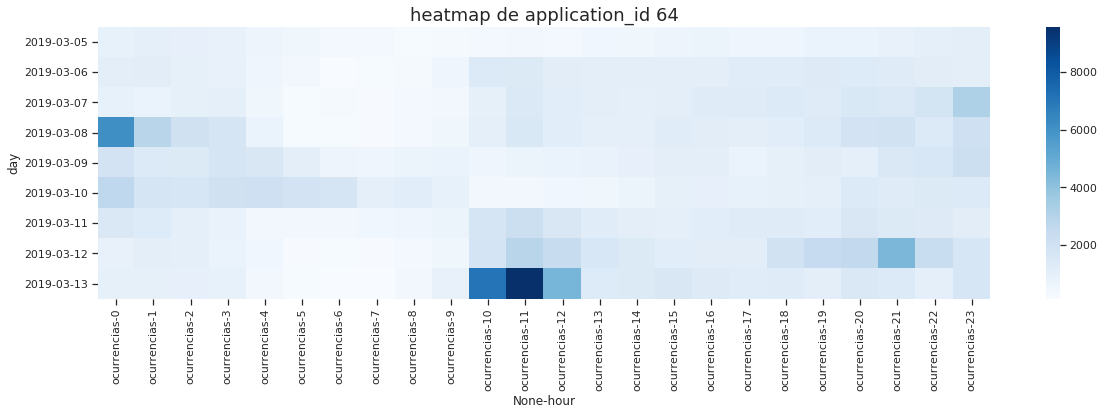

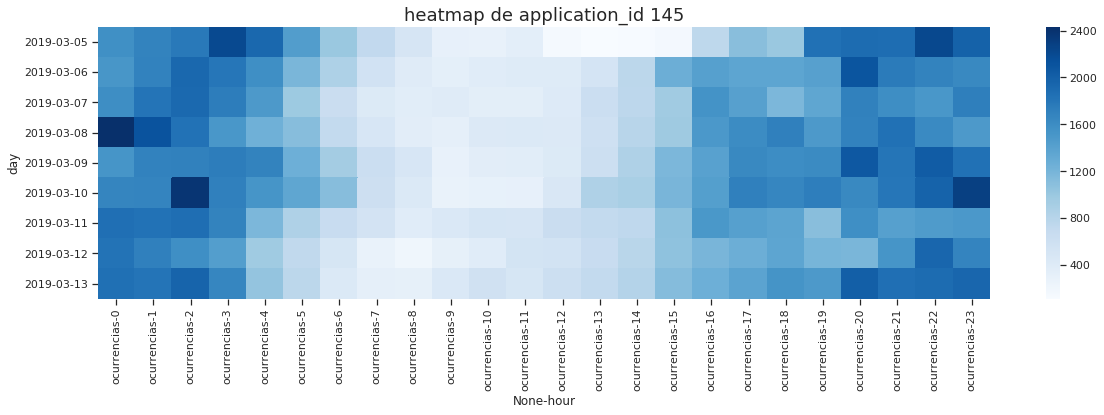

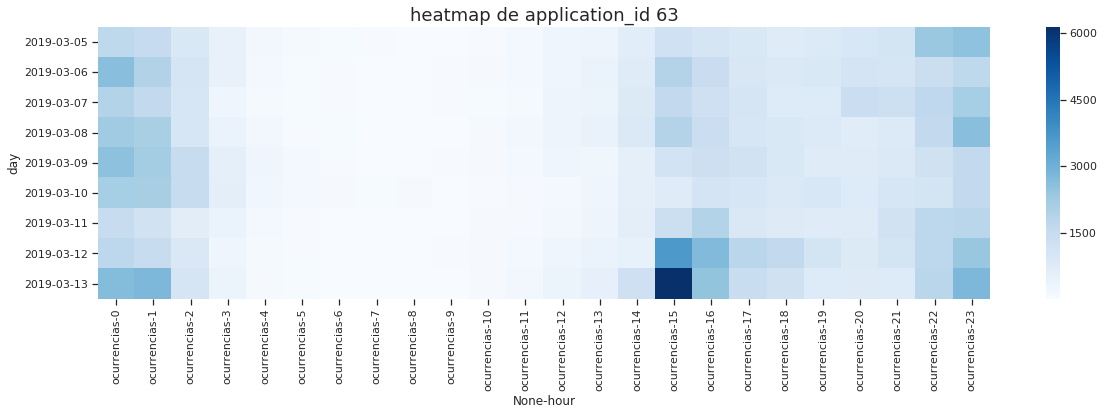

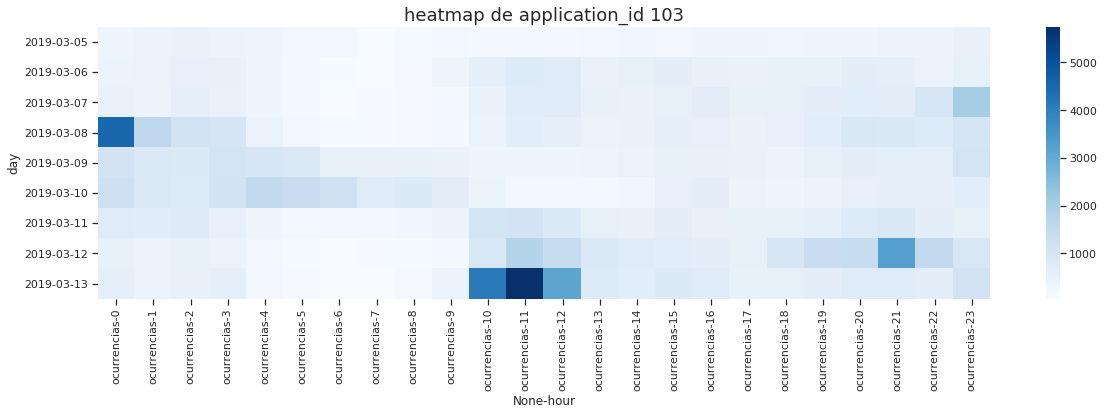

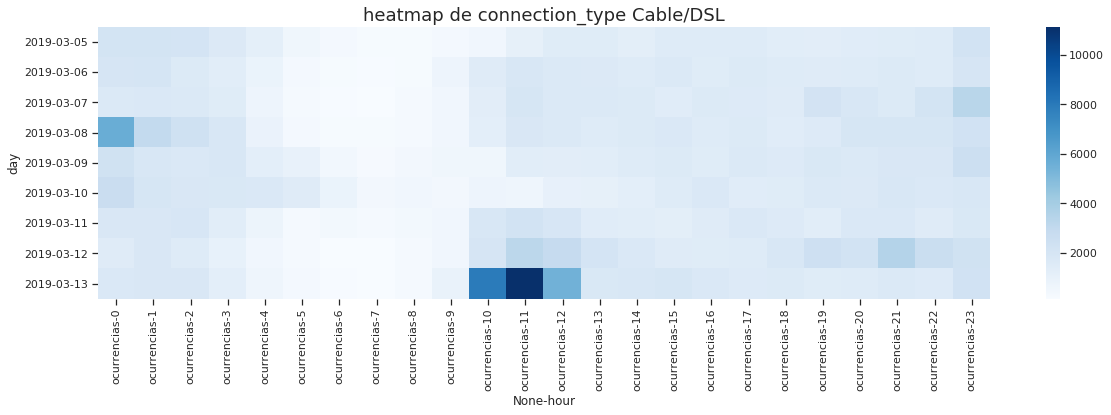

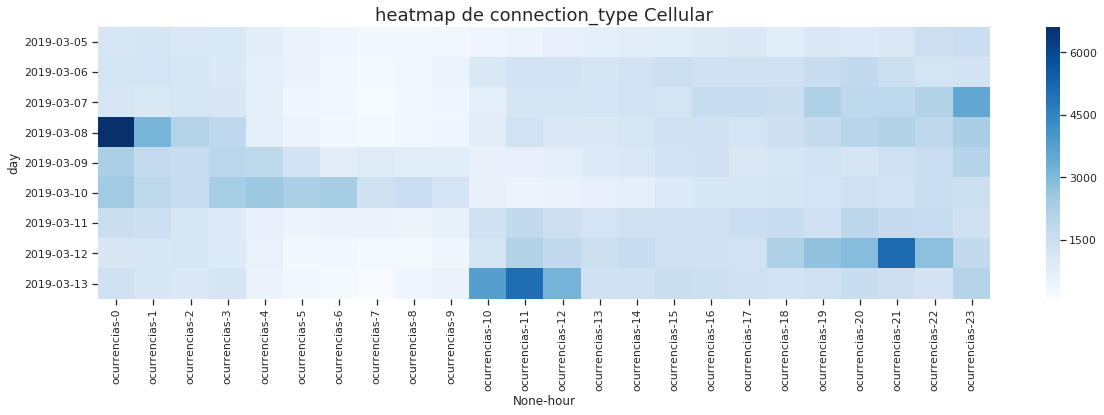

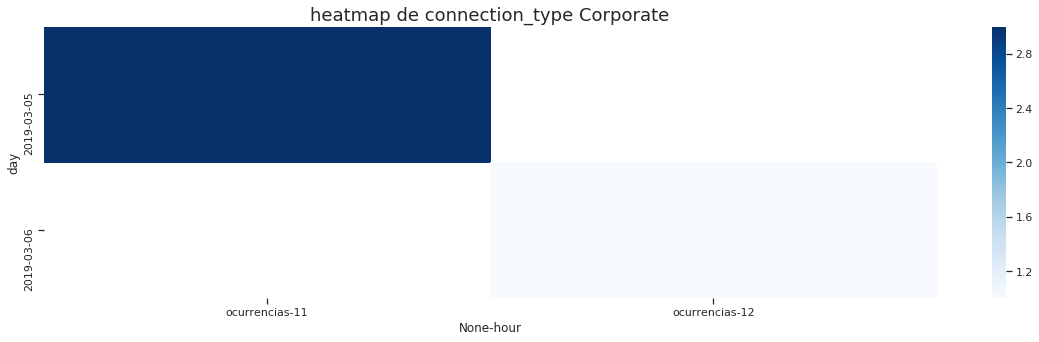

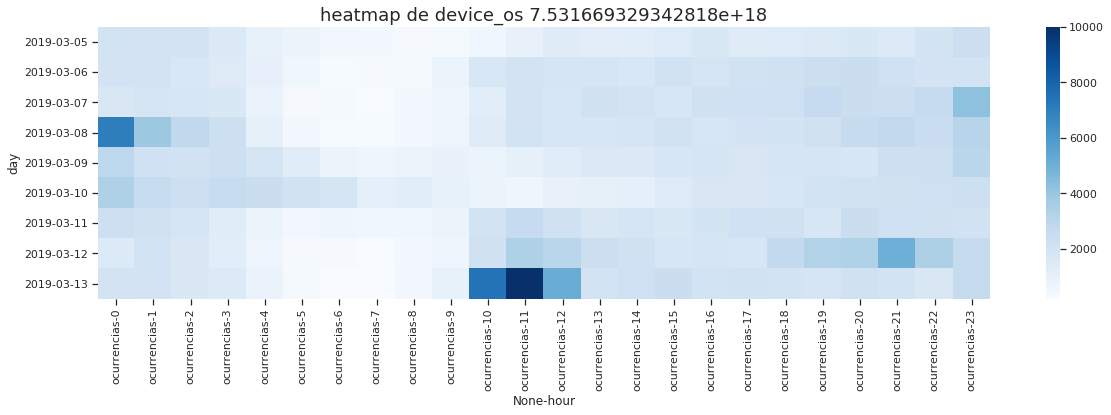

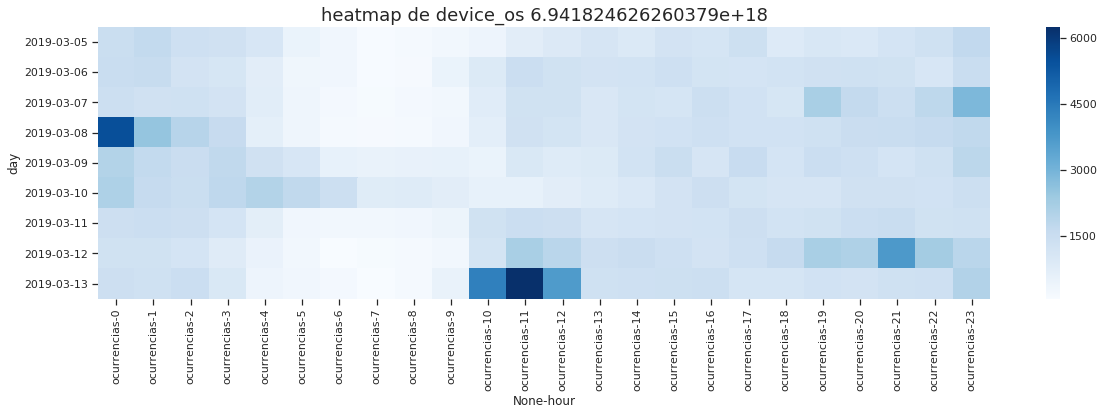

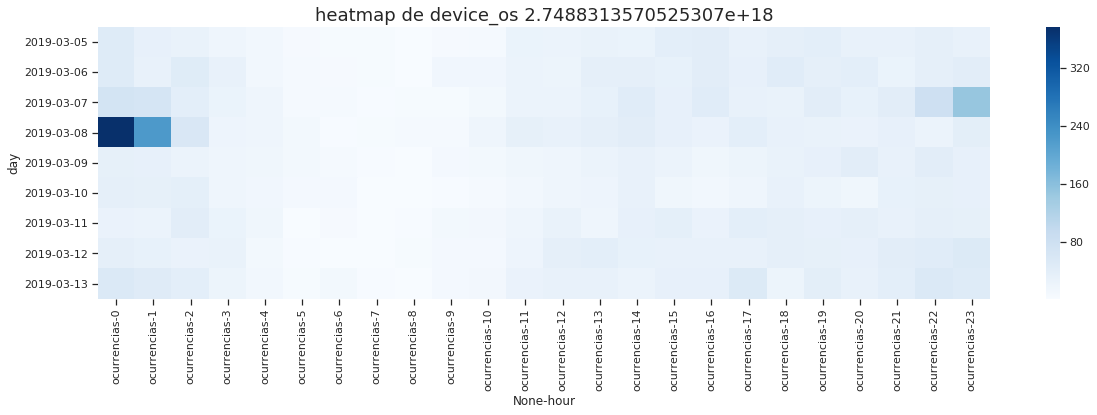

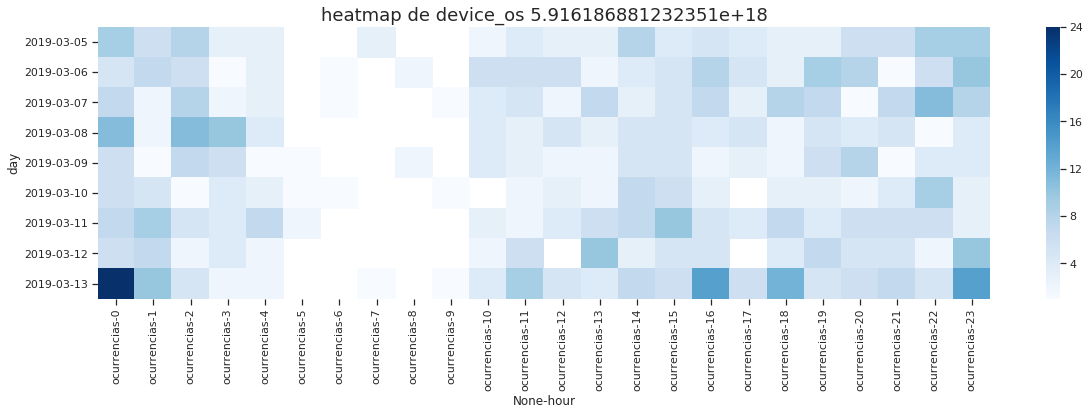

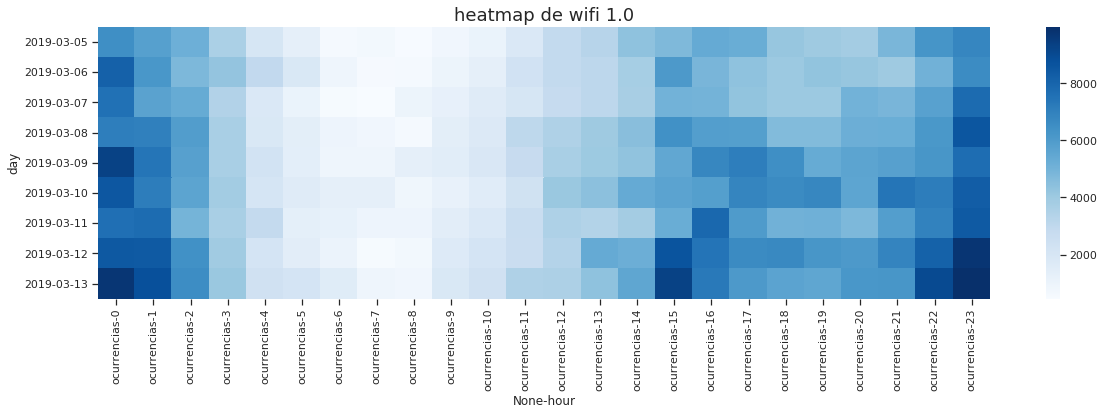

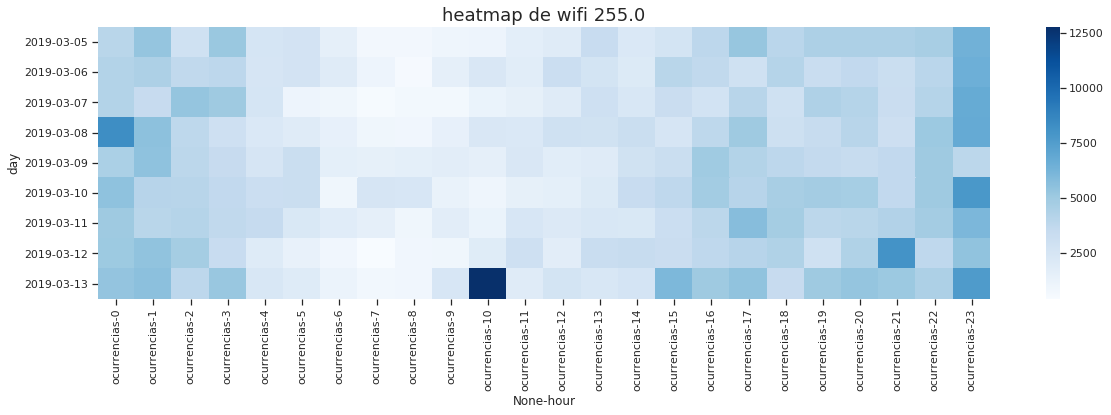

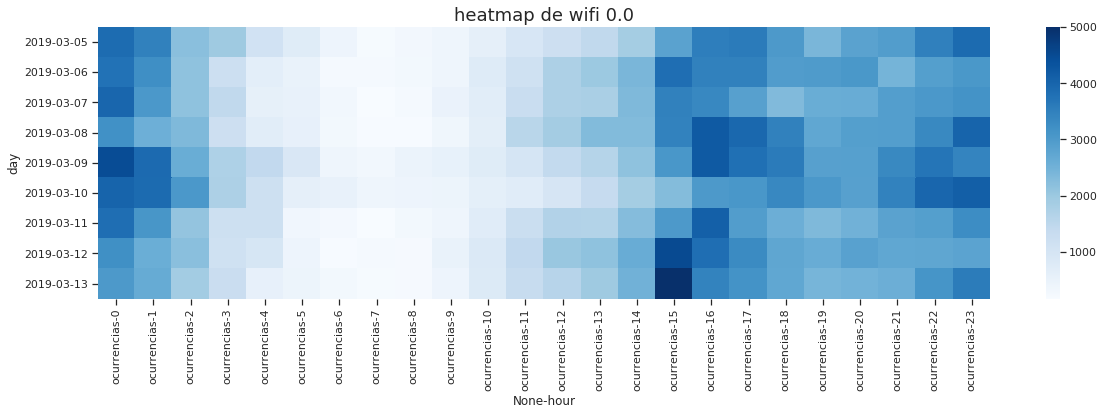

In [19]:
for i in top5.keys():
    for j in top5[i]:
        if i != 'day' and i != 'hour':
            matriz = events.loc[events[i]==j][['day','hour', 'ocurrencias']].groupby(['day','hour']).count().unstack()
            fig, ax = plt.subplots(figsize=(20,5))
            plt.title('heatmap de ' + str(i) + ' ' + str(j), fontsize = 18)
            sns.heatmap(matriz, cmap='Blues', ax = ax)